In [1]:
""" Part 2 """

In [2]:
# Loading the IMDB dataset

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
# Make sure the data is right

print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [5]:
# Make sure no work index will exceed 10,000

print(max([max(sequence) for sequence in train_data]))

9999


In [6]:
# Vectorize the data
# Encoding the integer sequences into a binary matrix

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
# The model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# Compiling the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# Configuring the optimizer

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
# Using custom losses and metrics

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [12]:
# Setting aside a validation set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# Training the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.5308 - acc: 0.7792 - val_loss: 0.4038 - val_acc: 0.8700
Epoch 2/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.3214 - acc: 0.9031 - val_loss: 0.3215 - val_acc: 0.8820
Epoch 3/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.2339 - acc: 0.9270 - val_loss: 0.2817 - val_acc: 0.8901
Epoch 4/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1819 - acc: 0.9431 - val_loss: 0.3156 - val_acc: 0.8747
Epoch 5/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1479 - acc: 0.9520 - val_loss: 0.2820 - val_acc: 0.8874
Epoch 6/20
15000/15000 [==============================] - 2s 141us/step - loss: 0.1234 - acc: 0.9608 - val_loss: 0.2977 - val_acc: 0.8821
Epoch 7/20
15000/15000 [==============================] - 2s 141us/step - 

In [15]:
# Look at the History object data

history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


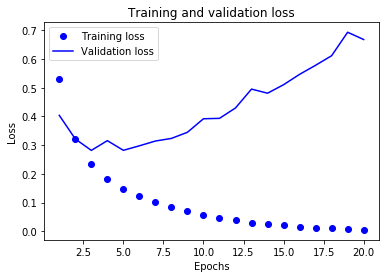

In [17]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

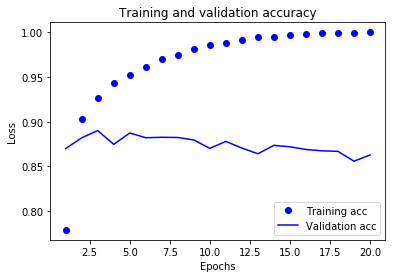

In [18]:
# Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
# Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.4574 - accuracy: 0.8230
Epoch 2/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.2574 - accuracy: 0.9084
Epoch 3/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.1969 - accuracy: 0.9290
Epoch 4/4
25000/25000 [==============================] - 2s 98us/step


In [21]:
# Print out the results

print(results)

[0.2960368203735352, 0.8840799927711487]


In [24]:
"""
After having trained a network, you'll want to use it in a practical setting.
You can generate the likelihood of reviews being positive by using the predict
method.
"""

prediction_output = model.predict(x_test)

# There's too many numbers in the list, let's just print out the first
# 100 entries
for i in range(100):
    print(prediction_output[i])

[0.22951892]
[0.9995199]
[0.95058644]
[0.8479811]
[0.96451575]
[0.83710885]
[0.9996842]
[0.00751388]
[0.96824634]
[0.99209034]
[0.96898794]
[0.01111126]
[0.00014076]
[0.07813624]
[0.9917291]
[6.765127e-06]
[0.9374752]
[0.8345111]
[0.00225261]
[0.03749222]
[0.9957309]
[0.99091756]
[0.34306312]
[0.92097795]
[0.9083121]
[0.9886076]
[0.04541481]
[0.96455]
[0.9776981]
[2.399087e-05]
[0.9782593]
[0.1835194]
[0.9204429]
[4.7683716e-07]
[0.00855434]
[0.00615135]
[0.9981961]
[0.96828747]
[0.17146692]
[0.00683674]
[0.9953874]
[0.99947226]
[0.01176322]
[0.92364454]
[0.99984753]
[0.9646946]
[0.02602562]
[0.00045174]
[0.00596392]
[0.43121913]
[0.00194764]
[0.3525753]
[0.80911976]
[0.9595634]
[0.9077723]
[0.41638502]
[0.6037676]
[0.82955587]
[0.00155258]
[0.66874623]
[0.1802283]
[0.05815923]
[0.93792605]
[0.06121632]
[0.0152649]
[0.99827766]
[0.08688778]
[0.9775981]
[0.99745494]
[0.9337425]
[0.95011306]
[0.99388814]
[0.69152004]
[0.01676565]
[0.02077189]
[0.32473493]
[0.00198975]
[0.9519081]
[0.9094